In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [2]:
#Keras
from tensorflow import keras

# Import of keras model and hidden layers for CNN
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk('downloads/fyp/'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

681


In [3]:
import cv2
import numpy as np
import os

IMG_SIZE = 128
imagepaths = []
X = []
y = []

for dirname, _, filenames in os.walk('downloads/fyp/'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(np.array(img))

        # Check if the filename contains the word "pothole" and label accordingly
        if "pothole" in image:
            y.append('POTHOLES')
        else:
            y.append('NORMAL')
    except:
        pass 

print(len(X))
print(len(y))
 

680
680


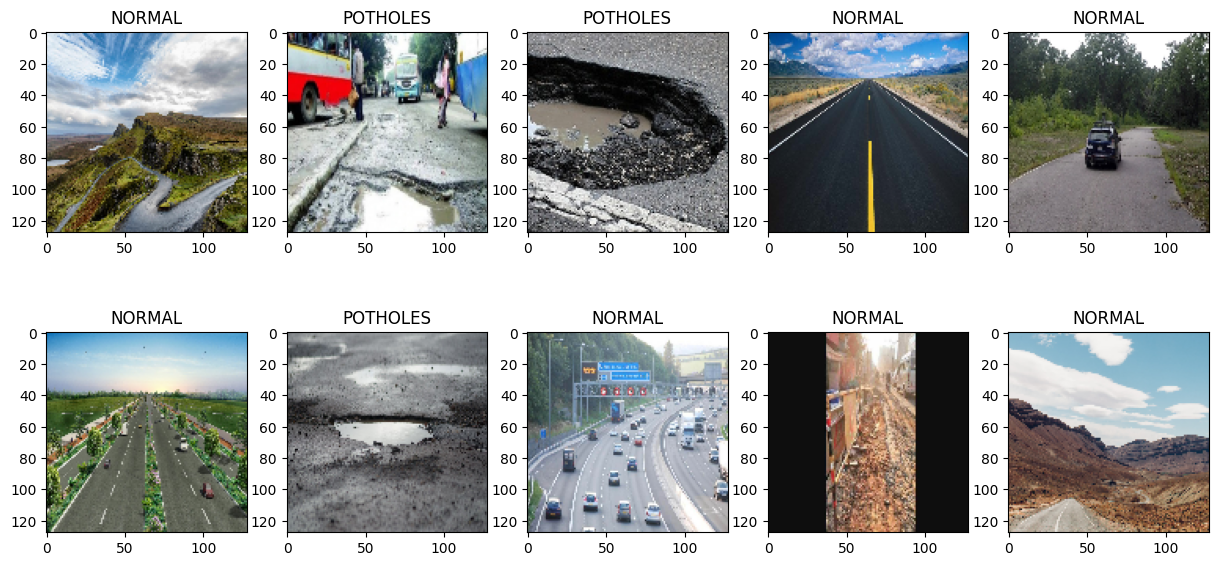

In [6]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [7]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [8]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [9]:
#Model configuration for training purpose
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [11]:
model.fit(x_train, y_train, epochs=30, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))

Epoch 1/30
43/43 - 60s - loss: 4.2285 - accuracy: 0.4882 - val_loss: 0.7460 - val_accuracy: 0.4824 - 60s/epoch - 1s/step
Epoch 2/30
43/43 - 52s - loss: 0.6310 - accuracy: 0.6667 - val_loss: 0.6643 - val_accuracy: 0.5765 - 52s/epoch - 1s/step
Epoch 3/30
43/43 - 57s - loss: 0.6154 - accuracy: 0.6784 - val_loss: 0.5018 - val_accuracy: 0.7412 - 57s/epoch - 1s/step
Epoch 4/30
43/43 - 54s - loss: 0.6074 - accuracy: 0.6529 - val_loss: 0.5558 - val_accuracy: 0.6765 - 54s/epoch - 1s/step
Epoch 5/30
43/43 - 48s - loss: 0.4677 - accuracy: 0.7745 - val_loss: 0.3958 - val_accuracy: 0.8000 - 48s/epoch - 1s/step
Epoch 6/30
43/43 - 48s - loss: 0.4564 - accuracy: 0.7706 - val_loss: 0.4854 - val_accuracy: 0.7471 - 48s/epoch - 1s/step
Epoch 7/30
43/43 - 50s - loss: 0.4222 - accuracy: 0.8353 - val_loss: 1.0360 - val_accuracy: 0.5059 - 50s/epoch - 1s/step
Epoch 8/30
43/43 - 50s - loss: 0.5600 - accuracy: 0.6922 - val_loss: 0.4843 - val_accuracy: 0.7706 - 50s/epoch - 1s/step
Epoch 9/30
43/43 - 49s - loss: 0

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

6/6 [==============================] - 5s 882ms/step - loss: 0.8357 - accuracy: 0.8176
Test accuracy: 81.76%


In [14]:
# Making predictions on test data
prediction = model.predict(x_test)

6/6 [==============================] - 6s 856ms/step


In [15]:
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)

In [16]:
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)

In [17]:
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_test2, y_pred),
             columns=["Predicted NORMAL", "Predicted POTHOLES"],
             index=["Actual NORMAL", "Actual POTHOLES"])

,Predicted NORMAL,Predicted POTHOLES
Actual NORMAL,72,10
Actual POTHOLES,21,67


# VGG16 Transfer Learning

In [18]:
IMG_SIZE=128

# training config:
epochs = 5
batch_size = 32

X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('downloads/fyp/')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

In [19]:
IMG_SIZE=128

# training config:
epochs = 5
batch_size = 32

filename=[]
y=[]
for image in imagepaths:
    try:
        #filename.append(image[image.rfind('/')+1:])
        filename.append(image)
        if(image.startswith('downloads/fyp/')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

In [20]:
img_df = pd.DataFrame(
    {'filename': filename,
     'y': y
    })

img_df=img_df.sample(frac=1)

In [21]:
tr_img=img_df[:450]
valid_img=img_df[450:]

In [22]:
IMAGE_SIZE = [128, 128]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [23]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [24]:
folders = glob('downloads/fyp/' + '/*')


In [25]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [26]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [27]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [28]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy'])

In [29]:
# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [30]:
test_gen = gen.flow_from_dataframe(
        dataframe=img_df,
        #directory='/kaggle/input/pothole-detection-dataset',
        x_col="filename",
        y_col="y",
        target_size=IMAGE_SIZE)
print(test_gen.class_indices)

Found 681 validated image filenames belonging to 1 classes.
{'NORMAL': 0}


In [31]:
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -107.88616 max: 146.26212


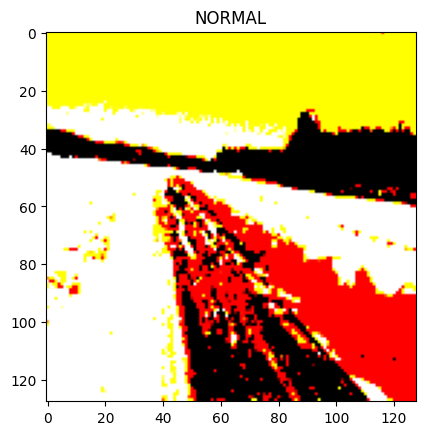

In [32]:
try:
    for x, y in test_gen:
      print("min:", x[0].min(), "max:", x[0].max())
      plt.title(labels[np.argmax(y[0])])
      plt.imshow(x[0])
      plt.show()
      break
except:
    pass

In [33]:
train_path = 'downloads/fyp'
# create generators
train_generator = gen.flow_from_dataframe(
        dataframe=tr_img,
        x_col="filename",
        y_col="y",
        target_size=IMAGE_SIZE,
        shuffle=True,
      batch_size=batch_size)

valid_generator = gen.flow_from_dataframe(
        dataframe=valid_img,
        x_col="filename",
        y_col="y",
        target_size=IMAGE_SIZE,
        shuffle=True,
      batch_size=batch_size)

Found 450 validated image filenames belonging to 1 classes.
Found 231 validated image filenames belonging to 1 classes.


In [34]:
train_img_path = 'downloads/fyp' + '/*/*.j*'
# fit the model
try:
    r = model.fit_generator(
          train_generator,
          validation_data=valid_generator,
          epochs=epochs,
          steps_per_epoch=len(image_files) // batch_size,
          validation_steps=len(valid_image_files) // batch_size)
except:
    pass

In [49]:
import cv2

# Load the video file
cap = cv2.VideoCapture('pothole.mp4')

# Create a Cascade Classifier for potholes
pothole_cascade = cv2.CascadeClassifier('.xml')

# Define a function to detect potholes in each frame
def detect_potholes(frame):
    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect potholes using the cascade classifier
    potholes = pothole_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    # Draw a rectangle around each pothole
    for (x, y, w, h) in potholes:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    return frame

# Loop through the frames in the video and detect potholes
while cap.isOpened():
    ret, frame = cap.read()
    
    if ret:
        # Detect potholes in the frame
        frame = detect_potholes(frame)
        
        # Display the resulting frame
        cv2.imshow('Pothole Detection', frame)
        
        # Press 'q' to quit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break

# Release the video file and close all windows
cap.release()
cv2.destroyAllWindows()

553467096/553467096 [==============================] - 160s 0us/step


INFO:tensorflow:Assets written to: ram://4ffd3835-6f26-47c6-a69c-585bc911e4c4/assets


INFO:tensorflow:Assets written to: ram://4ffd3835-6f26-47c6-a69c-585bc911e4c4/assets


Model saved at: C:\Users\Administrator\Downloads\model.pkl


OSError: No file or directory found at model.h5